<img src=https://www.icesi.edu.co/wp-content/uploads/2024/08/financiacion-universidad-icesi.png width="450" height="200" align="center">

#**<big><big><i>Clusterizacion de perfiles de usuarios bancarios</i>**

# **<big>Analisis Exploratorio de los datos</big>**

<big><big>**Integrantes**</big></big>
* Juan Jose Diaz
* Mateo Silva

---

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datos_ASOC_CMV.csv')
df.head()

,IdUnico,Fecha_Ingreso,Estado,Nombre_Estado,Tipo_Vinculacion,Nombre_Tipo_Vinculacion,Estado_Civil,Personas_a_Cargo,Personas_a_Cargo_Menores_18,Sexo,...,numCantidadProductos,FondoSocialViviendaBanco,PrimaNivelada,Crediasociado,CuentaPension,FIC_365,FIC_90,FIC_Vista,Inversiones_No_Tradicionales,Renta_Fija_Corto_Plazo
0,1,10/31/2023,14,Inactivo,9,Técnicos y Tecnólogos,Soltero,0,0,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7/29/2024,10,Activo Normal,7,Profesional,Soltero,0,0,F,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3/20/2025,11,Activo Cobranza Interna,3,Estudiante,Soltero,0,0,F,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3/14/2024,10,Activo Normal,9,Técnicos y Tecnólogos,Soltero,0,0,M,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10/19/2021,14,Inactivo,9,Técnicos y Tecnólogos,Soltero,0,2,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Obtain general information


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185512 entries, 0 to 185511
Columns: 119 entries, IdUnico to Renta_Fija_Corto_Plazo
dtypes: float64(93), int64(6), object(20)
memory usage: 168.4+ MB


## Eliminacion de columnas redundantes

In [4]:
columnas_a_eliminar = [
    #El id no se va a eliminar en este cuarderno por temas de union en la clusterizacion
    #'IdUnico',
    'Estado',
    'Tipo_Vinculacion',
    'Tipo_Vivienda',
    'Nivel_Academico',
    'Ocupacion',
    'Motivo_Retiro',

    # Variables de anteriores Clusterizaciones
    'Segmento_Ingresos_vs_Antiguedad',
    'Segmento_Ciclo_de_Vida',

    # Variables redundantes con otras columnas
    'Descripcion_Oficina',
    'Regional',

    # Fechas de registro de datos
    'Fecha_Ingresos',
    'Fecha_Ingresos_Deflactados',

    #variables ambiguas y sin aporte
    'indInactivo',
    'Ptaje_acierta'
]

df = df.drop(columns=columnas_a_eliminar)  # 'errors=ignore' evita error si alguna columna no existe

In [5]:
# Conteo de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos:")
print((df.isnull().sum() / len(df)) * 100)

Valores nulos por columna:
IdUnico                         0
Fecha_Ingreso                   0
Nombre_Estado                   0
Nombre_Tipo_Vinculacion         0
Estado_Civil                    0
                               ..
FIC_365                         1
FIC_90                          1
FIC_Vista                       1
Inversiones_No_Tradicionales    1
Renta_Fija_Corto_Plazo          1
Length: 105, dtype: int64

Porcentaje de valores nulos:
IdUnico                         0.000000
Fecha_Ingreso                   0.000000
Nombre_Estado                   0.000000
Nombre_Tipo_Vinculacion         0.000000
Estado_Civil                    0.000000
                                  ...   
FIC_365                         0.000539
FIC_90                          0.000539
FIC_Vista                       0.000539
Inversiones_No_Tradicionales    0.000539
Renta_Fija_Corto_Plazo          0.000539
Length: 105, dtype: float64


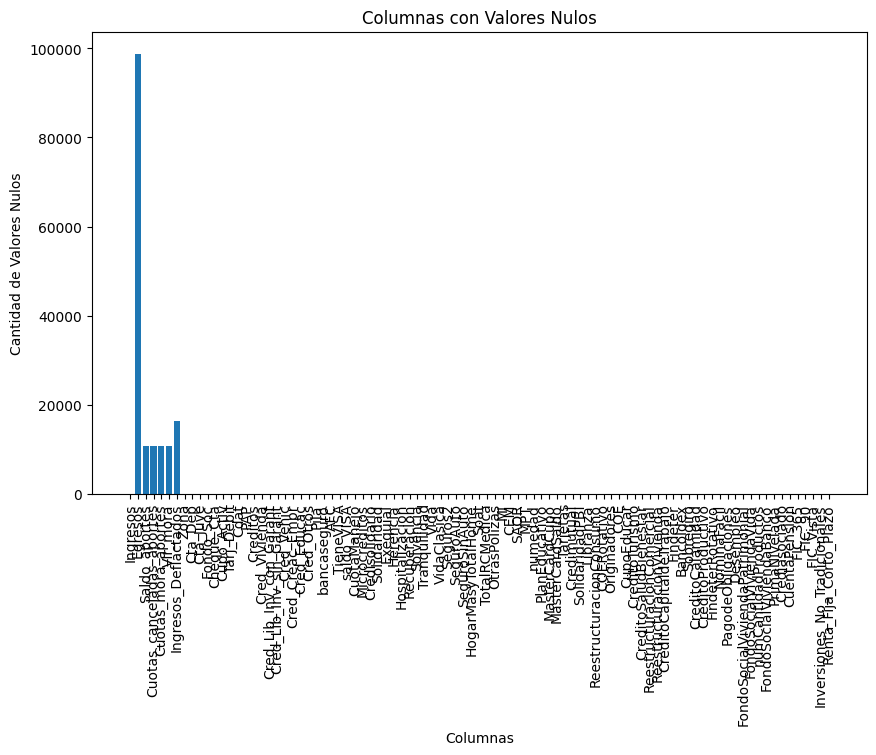

In [6]:
# Calcular la cantidad de valores nulos por columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
null_counts = null_counts[null_counts > 0]

# Crear el gráfico solo si hay columnas con valores nulos
if len(null_counts) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(null_counts.index, null_counts.values)
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de Valores Nulos')
    plt.title('Columnas con Valores Nulos')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("El DataFrame no contiene valores nulos en ninguna columna.")


In [7]:
df = df.drop(columns=['Egresos'], errors='ignore')

In [8]:
df = df.dropna(subset=['Saldo_aportes', 'Cuotas_canceladas_aportes', 'Cuotas_mora_aportes', 'Vlr_mora', 'Ingresos_Deflactados', 'Ingresos'])

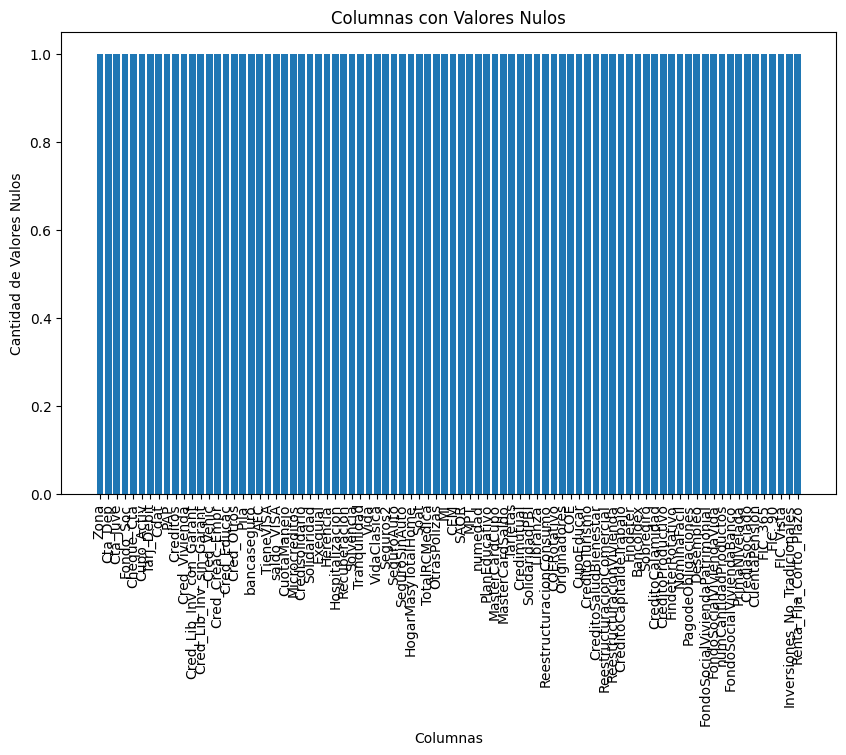

In [9]:
# Calcular la cantidad de valores nulos por columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
null_counts = null_counts[null_counts > 0]

# Crear el gráfico solo si hay columnas con valores nulos
if len(null_counts) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(null_counts.index, null_counts.values)
    plt.xlabel('Columnas')
    plt.ylabel('Cantidad de Valores Nulos')
    plt.title('Columnas con Valores Nulos')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("El DataFrame no contiene valores nulos en ninguna columna.")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159648 entries, 0 to 185511
Columns: 104 entries, IdUnico to Renta_Fija_Corto_Plazo
dtypes: float64(89), int64(3), object(12)
memory usage: 127.9+ MB


# **Variables Categoricas**

In [11]:
# Valores únicos por columna
print("Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Mostrar ejemplos de valores únicos para columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())

Valores únicos por columna:
IdUnico: 159648
Fecha_Ingreso: 5814
Nombre_Estado: 7
Nombre_Tipo_Vinculacion: 12
Estado_Civil: 8
Personas_a_Cargo: 20
Personas_a_Cargo_Menores_18: 14
Sexo: 3
Estrato: 8
Nombre_Tipo_Vivienda: 5
Nombre_Nivel_Academico: 7
Fecha_Nacimiento: 24040
Ingresos: 55164
Nombre_Titulo_Obtenido: 3565
Nombre_Ocupacion: 10
Saldo_aportes: 98681
Cuotas_canceladas_aportes: 670
Cuotas_mora_aportes: 223
Vlr_mora: 13895
Ingresos_Deflactados: 72177
Zona: 43
Cta_Dep: 2
Cta_Juve: 2
Fondo_Soc: 2
Cheque_Cta: 2
Cupo_Activ: 2
Tarj_Debit: 2
Cdat: 2
PAP: 2
Creditos: 2
Cred_Vivienda: 2
Cred_Lib_Inv_con_Garant: 1
Cred_Lib_Inv_sin_Garant: 2
Cred_Vehic: 2
Cred_Creac_Empr: 1
Cred_Educac: 2
Cred_Otros: 1
Pila: 2
bancaseguro: 2
AFC: 2
TieneVISA: 2
saldo_VISA: 2
CuotaManejo: 1
Microcreditos: 1
Credisolidario: 1
Solidaridad: 2
Exequial: 2
Herencia: 2
Hospitalizacion: 2
Recuperacion: 2
Solvencia: 2
Tranquilidad: 2
Vida: 2
VidaClasica: 2
Seguros2: 2
SeguroAuto: 2
SeguroSinAuto: 2
HogarMasyTotalHome:

In [12]:
cat_cols

Index(['Fecha_Ingreso', 'Nombre_Estado', 'Nombre_Tipo_Vinculacion',
       'Estado_Civil', 'Sexo', 'Estrato', 'Nombre_Tipo_Vivienda',
       'Nombre_Nivel_Academico', 'Fecha_Nacimiento', 'Nombre_Titulo_Obtenido',
       'Nombre_Ocupacion', 'Zona'],
      dtype='object')

In [13]:
for col in cat_cols:
    print(f"{col}: {df[col].isna().sum()}")

Fecha_Ingreso: 0
Nombre_Estado: 0
Nombre_Tipo_Vinculacion: 0
Estado_Civil: 0
Sexo: 0
Estrato: 0
Nombre_Tipo_Vivienda: 0
Nombre_Nivel_Academico: 0
Fecha_Nacimiento: 0
Nombre_Titulo_Obtenido: 0
Nombre_Ocupacion: 0
Zona: 1


## **Nombre Estado**

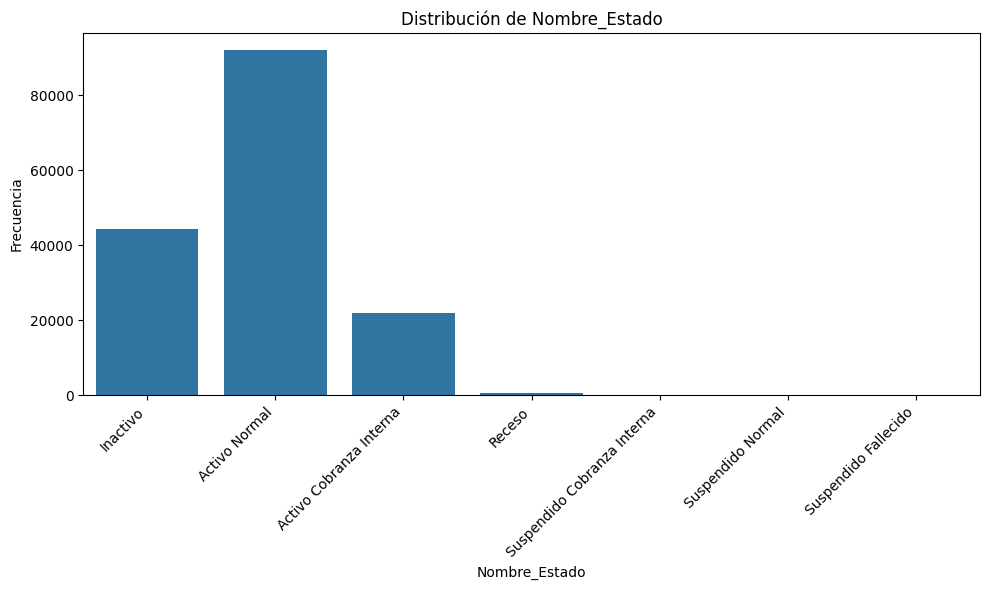

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
frecuencia = df['Nombre_Estado'].value_counts()
porcentaje = df['Nombre_Estado'].value_counts(normalize=True) * 100
moda = df['Nombre_Estado'].mode()[0]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Nombre_Estado', data=df)
plt.title('Distribución de Nombre_Estado')
plt.xlabel('Nombre_Estado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

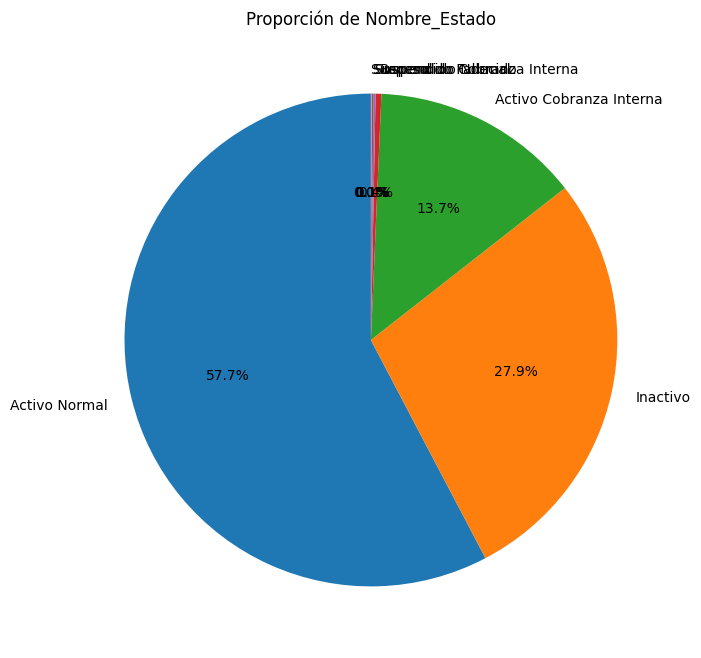

In [15]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Nombre_Estado')
plt.show()

## **Nombre Tipo Vinculacion**

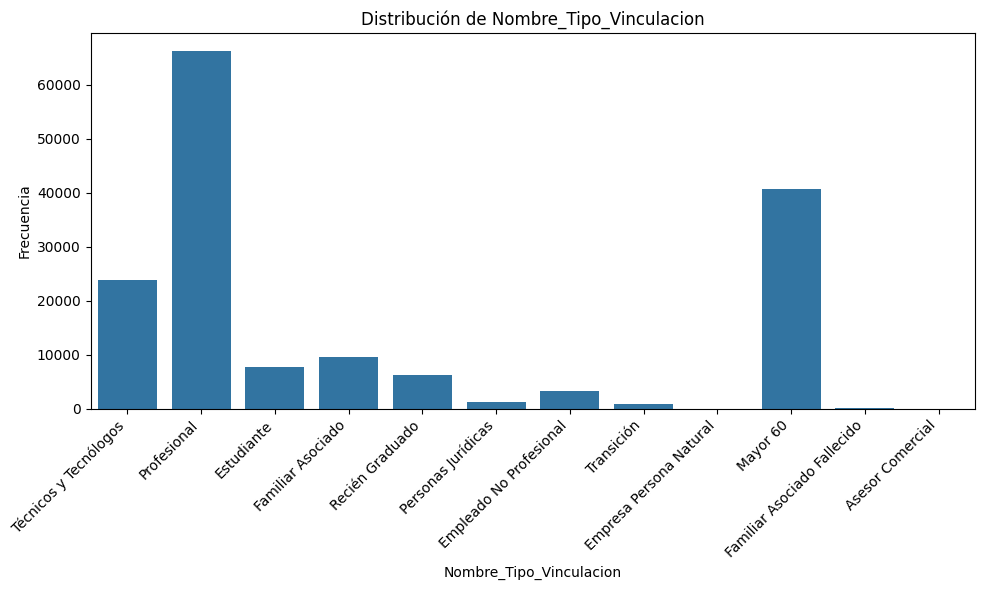

In [16]:
import matplotlib.pyplot as pltEstado_Civil
import seaborn as sns

# Estadísticas descriptivas
frecuencia = df['Nombre_Tipo_Vinculacion'].value_counts()
porcentaje = df['Nombre_Tipo_Vinculacion'].value_counts(normalize=True) * 100
moda = df['Nombre_Tipo_Vinculacion'].mode()[0]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Nombre_Tipo_Vinculacion', data=df)
plt.title('Distribución de Nombre_Tipo_Vinculacion')
plt.xlabel('Nombre_Tipo_Vinculacion')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

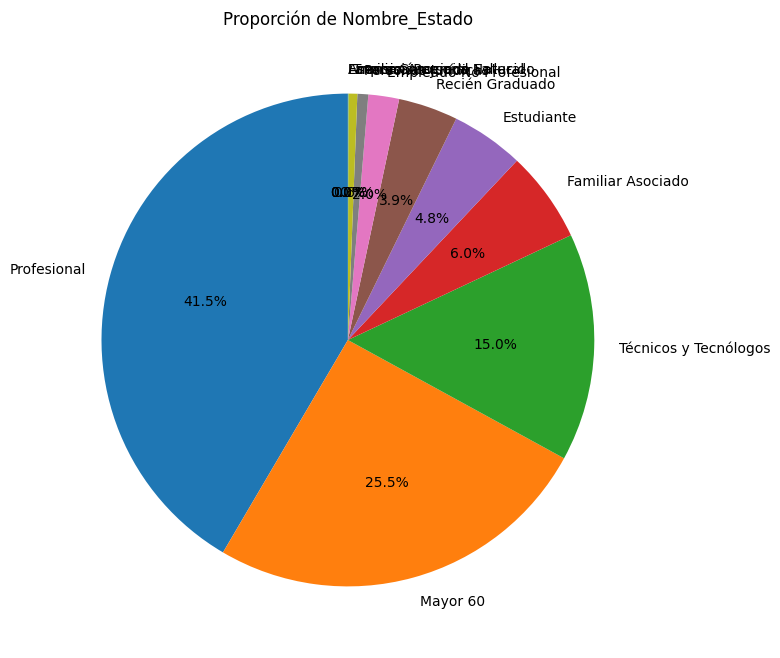

In [17]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Nombre_Estado')
plt.show()

## **Estado_Civil**

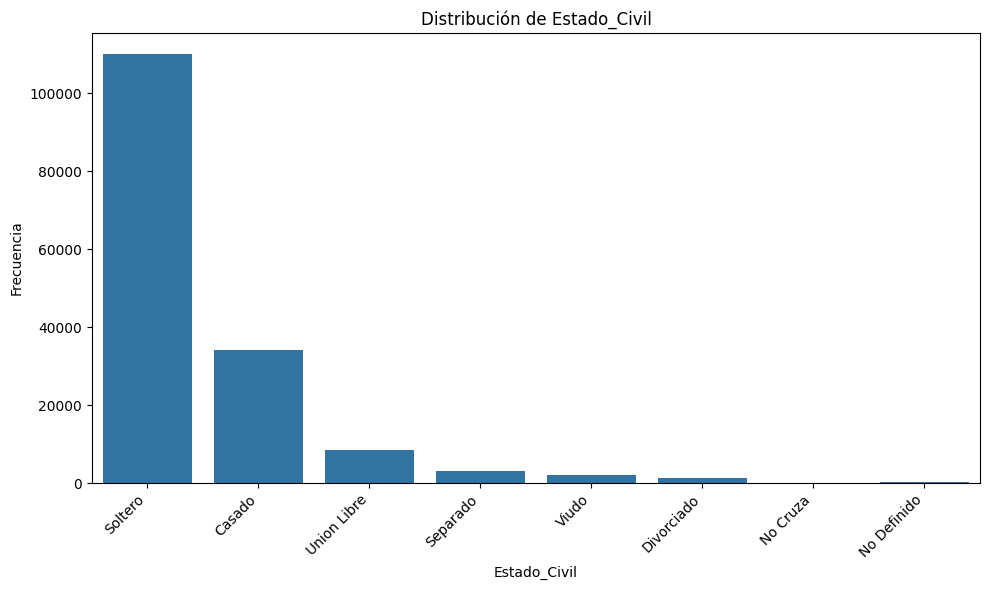

In [18]:
import matplotlib.pyplot as pltEstado_Civil
import seaborn as sns

# Estadísticas descriptivas
frecuencia = df['Estado_Civil'].value_counts()
porcentaje = df['Estado_Civil'].value_counts(normalize=True) * 100
moda = df['Estado_Civil'].mode()[0]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Estado_Civil', data=df)
plt.title('Distribución de Estado_Civil')
plt.xlabel('Estado_Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

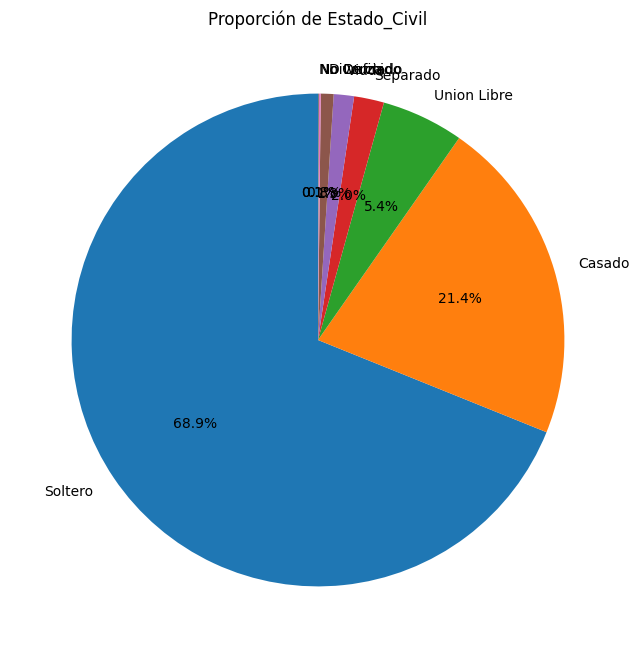

In [19]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Estado_Civil')
plt.show()

## **Sexo**

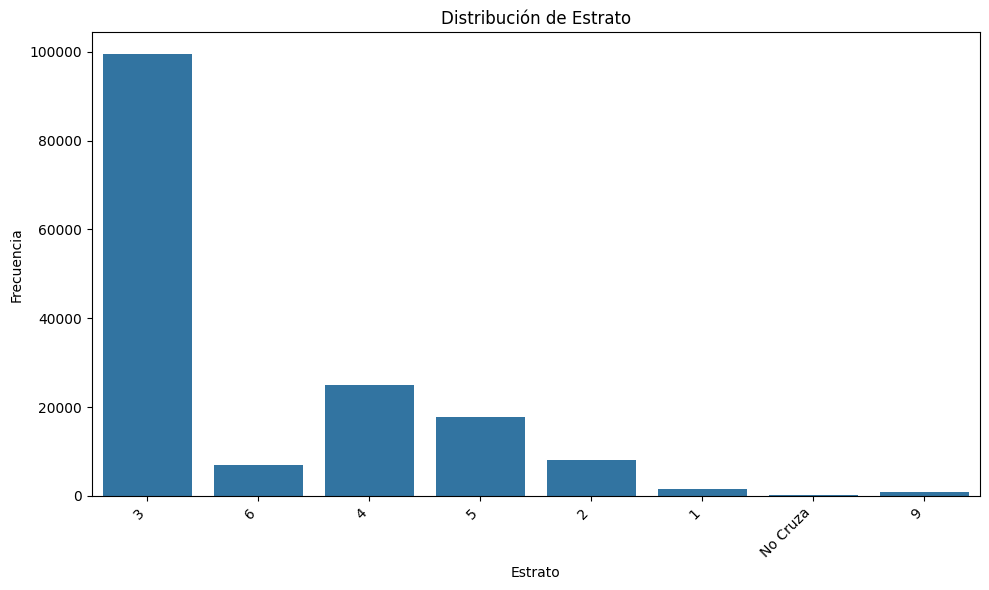

In [20]:
import matplotlib.pyplot as pltEstado_Civil
import seaborn as sns

# Estadísticas descriptivas
frecuencia = df['Estrato'].value_counts()
porcentaje = df['Estrato'].value_counts(normalize=True) * 100
moda = df['Estrato'].mode()[0]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Estrato', data=df)
plt.title('Distribución de Estrato')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

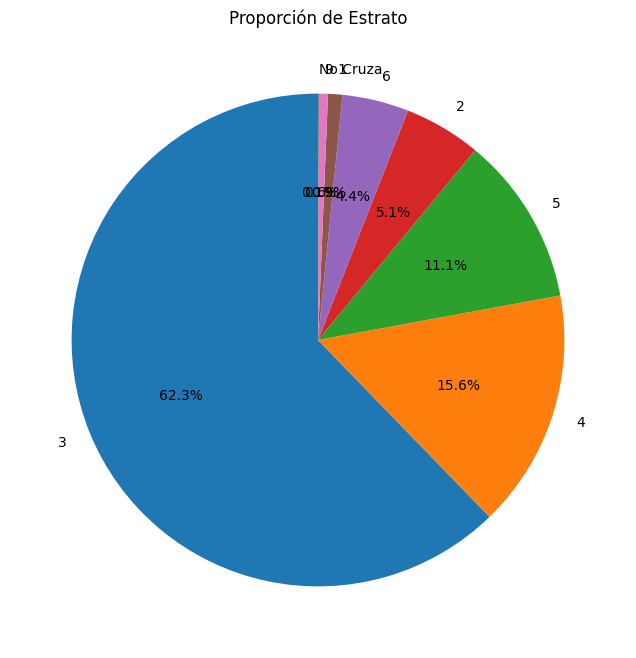

In [21]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Estrato')
plt.show()

## **Tipo_Vivienda**

In [22]:
# import matplotlib.pyplot as pltEstado_Civil
# import seaborn as sns

# # Estadísticas descriptivas
# frecuencia = df['Tipo_Vivienda'].value_counts()
# porcentaje = df['Tipo_Vivienda'].value_counts(normalize=True) * 100
# moda = df['Tipo_Vivienda'].mode()[0]

# # Gráfico de barras
# plt.figure(figsize=(10, 6))
# sns.countplot(x='Tipo_Vivienda', data=df)
# plt.title('Distribución de Tipo_Vivienda')
# plt.xlabel('Tipo_Vivienda')
# plt.ylabel('Frecuencia')
# plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
# plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
# plt.show()

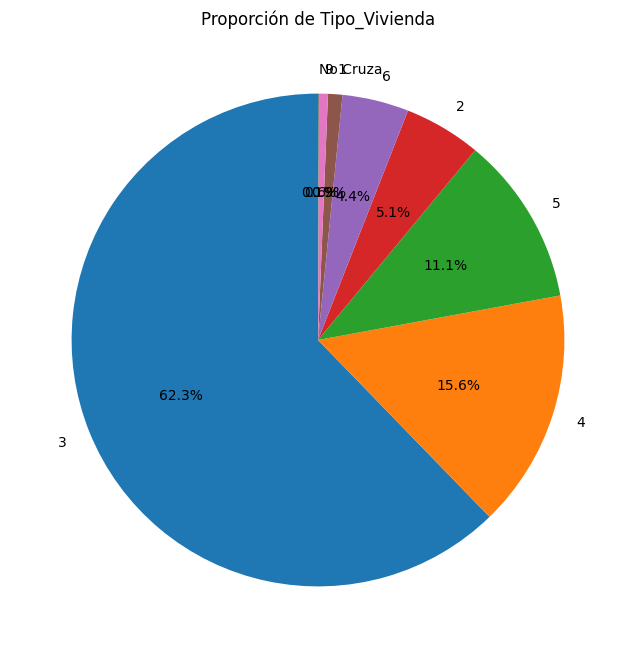

In [23]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Tipo_Vivienda')
plt.show()

## **Nombre_Nivel_Academico**

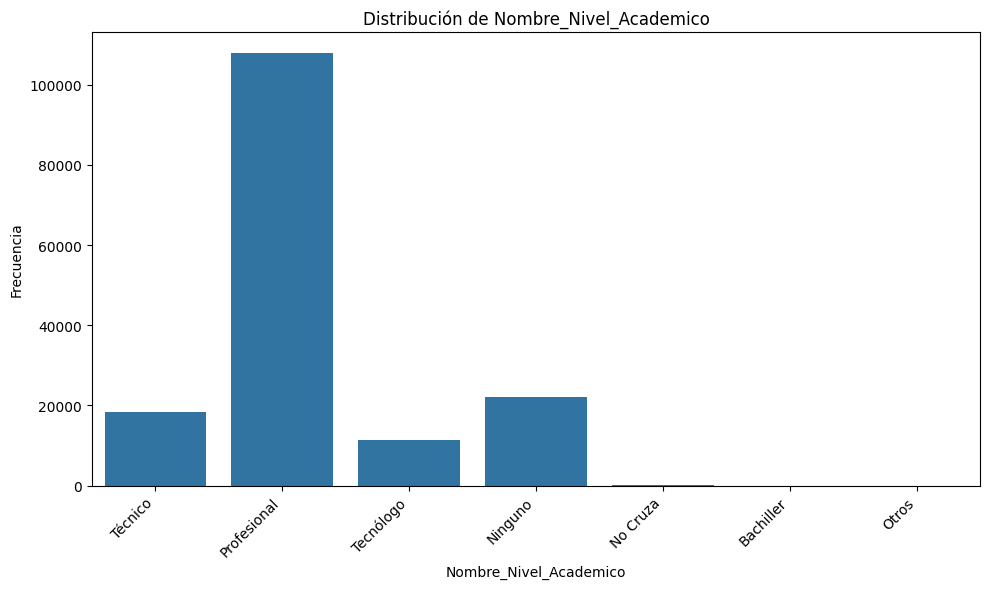

In [24]:
import matplotlib.pyplot as pltEstado_Civil
import seaborn as sns

# Estadísticas descriptivas
frecuencia = df['Nombre_Nivel_Academico'].value_counts()
porcentaje = df['Nombre_Nivel_Academico'].value_counts(normalize=True) * 100
moda = df['Nombre_Nivel_Academico'].mode()[0]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Nombre_Nivel_Academico', data=df)
plt.title('Distribución de Nombre_Nivel_Academico')
plt.xlabel('Nombre_Nivel_Academico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

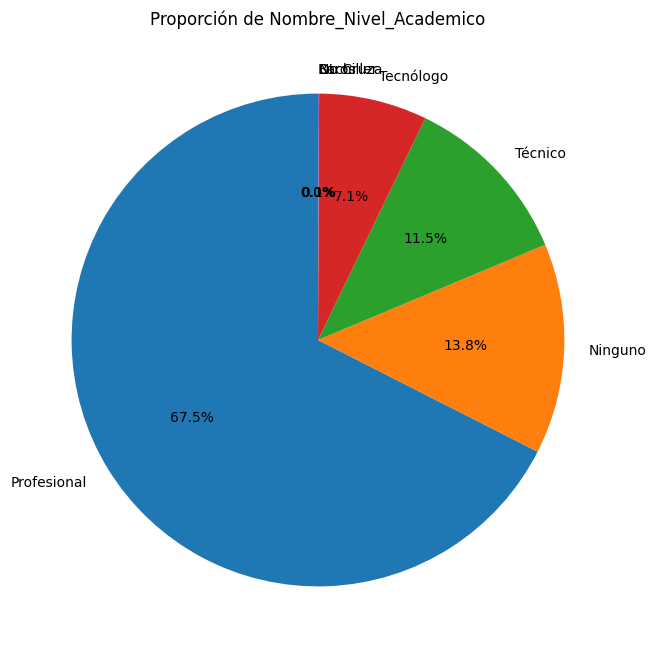

In [25]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Nombre_Nivel_Academico')
plt.show()

## **Nombre_Ocupacion**

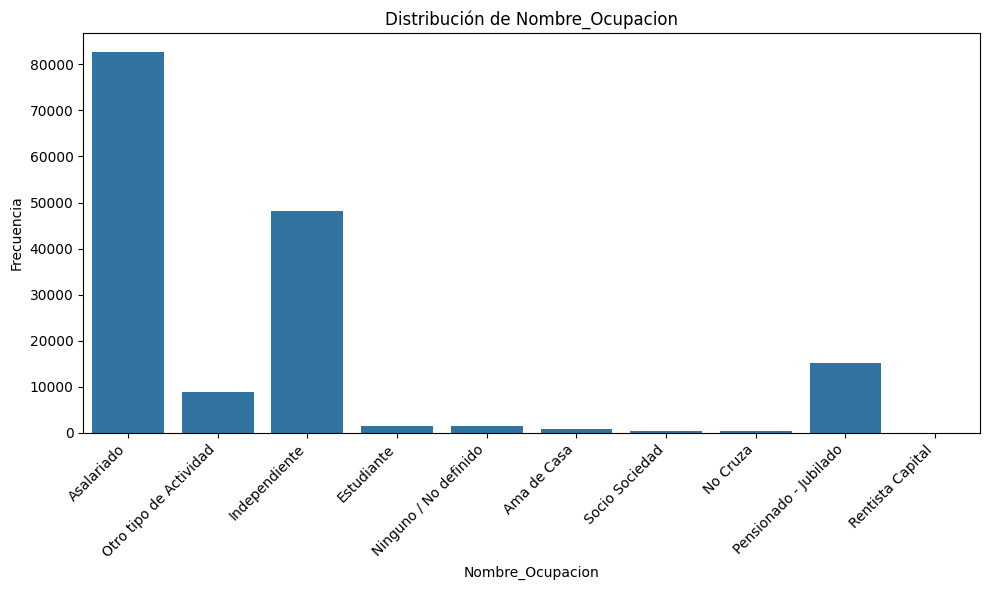

In [26]:
import matplotlib.pyplot as pltEstado_Civil
import seaborn as sns

# Estadísticas descriptivas
frecuencia = df['Nombre_Ocupacion'].value_counts()
porcentaje = df['Nombre_Ocupacion'].value_counts(normalize=True) * 100
moda = df['Nombre_Ocupacion'].mode()[0]

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Nombre_Ocupacion', data=df)
plt.title('Distribución de Nombre_Ocupacion')
plt.xlabel('Nombre_Ocupacion')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

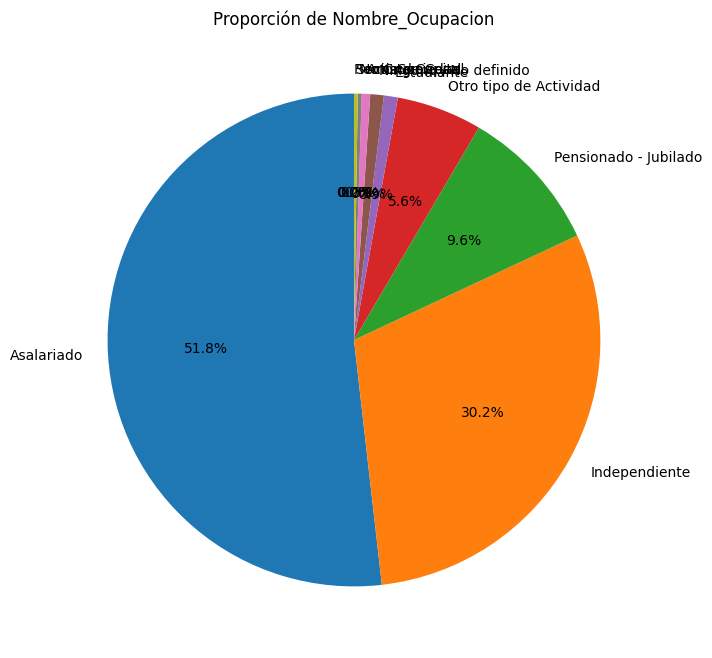

In [27]:
# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Nombre_Ocupacion')
plt.show()

# **Variables numericas**

In [28]:
# Boxplots para detectar outliers en variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols

Index(['IdUnico', 'Personas_a_Cargo', 'Personas_a_Cargo_Menores_18',
       'Ingresos', 'Saldo_aportes', 'Cuotas_canceladas_aportes',
       'Cuotas_mora_aportes', 'Vlr_mora', 'Ingresos_Deflactados', 'Cta_Dep',
       'Cta_Juve', 'Fondo_Soc', 'Cheque_Cta', 'Cupo_Activ', 'Tarj_Debit',
       'Cdat', 'PAP', 'Creditos', 'Cred_Vivienda', 'Cred_Lib_Inv_con_Garant',
       'Cred_Lib_Inv_sin_Garant', 'Cred_Vehic', 'Cred_Creac_Empr',
       'Cred_Educac', 'Cred_Otros', 'Pila', 'bancaseguro', 'AFC', 'TieneVISA',
       'saldo_VISA', 'CuotaManejo', 'Microcreditos', 'Credisolidario',
       'Solidaridad', 'Exequial', 'Herencia', 'Hospitalizacion',
       'Recuperacion', 'Solvencia', 'Tranquilidad', 'Vida', 'VidaClasica',
       'Seguros2', 'SeguroAuto', 'SeguroSinAuto', 'HogarMasyTotalHome', 'Soat',
       'TotalRCMedica', 'OtrasPolizas', 'MI', 'CEM', 'SAOR', 'MPT', 'numedad',
       'PlanEducativo', 'MasterCardCupo', 'MasterCardSaldo', 'Tarjetas',
       'Credimutual', 'SolidaridadPBI', 'Libranz

In [29]:
pd.set_option('display.max_rows', 100)
print(df[num_cols].isna().sum().sort_values(ascending=False))

Fondo_Soc                         1
Cta_Dep                           1
Cta_Juve                          1
Cred_Lib_Inv_sin_Garant           1
Cred_Lib_Inv_con_Garant           1
Cred_Vivienda                     1
Creditos                          1
PAP                               1
Cdat                              1
Tarj_Debit                        1
Cupo_Activ                        1
Cheque_Cta                        1
Cred_Otros                        1
Cred_Vehic                        1
Cred_Creac_Empr                   1
Cred_Educac                       1
bancaseguro                       1
Pila                              1
AFC                               1
Hospitalizacion                   1
Herencia                          1
Exequial                          1
Solidaridad                       1
Credisolidario                    1
Microcreditos                     1
CuotaManejo                       1
saldo_VISA                        1
TieneVISA                   

In [30]:
df = df.dropna(subset=['Cuotas_canceladas_aportes', 'Saldo_aportes','Cuotas_mora_aportes', 'Vlr_mora'])

In [31]:
#df = df.dropna(subset=['Nivel_Academico'])

En este punto eliminamos las siguientes variables:
 1. Cuotas_canceladas_aportes, Saldo_aportes, Cuotas_mora_aportes, Vlr_mora; debido a que entre estas siempre es la misma fila la que esta vacia, y no representa mucho para los datos.

 2. Nivel_Academico, debido a que esta representa muy poca cantidad de datos.

### Univariate analisys


#### Nombre y tipo de vinculacion

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

Esta variable tiene casi la mitad de sus registros con valores Nan, asi que hay que buscar alguna forma de imputar estos datos.

#### Ingresos

In [33]:
df.Ingresos

,Ingresos
0,1330000.0
1,3879436.0
2,2078310.0
3,2100000.0
4,980526.0
...,...
185506,2250000.0
185507,7500000.0
185509,4500000.0
185510,8220000.0


In [34]:
df['Ingresos'].isna().sum()

np.int64(0)

In [35]:
df = df.dropna(subset=['Ingresos'])
df['Ingresos'].isna().sum()

np.int64(0)

In [36]:
print("¡lets calculate some important metrics!\n")
print("\n--Central tendency:")
print(f'Mean: {round(df.Ingresos.mean(),1):,}')
print(f'Median: {round(df.Ingresos.quantile(0.5),1):,}')
print(f'Mode: {round(df.Ingresos.mode()[0],1):,}')
print(f'Min: {round(df.Ingresos.min(),1):,}')
print(f'Max: {round(df.Ingresos.max(),1):,}')

print("\n--Measures of dispersion:")
print(f'standard deviation: {round(df.Ingresos.std(),1):,}')
print(f"Variation coefficient: {round(df['Ingresos'].std() / df['Ingresos'].mean() * 100,1)}")
print(f"Range: {round(df['Ingresos'].max() - df['Ingresos'].min(),1):,} ")
print(f"IQR: {round(df['Ingresos'].quantile(0.75) - df['Ingresos'].quantile(0.25),1):,} ")

print("\n--Measures of distribution shape:")
print(f"Skewness: {round(df['Ingresos'].skew(),1)}")
print(f"Kurtosis: {round(df['Ingresos'].kurtosis(),1)}")

print("\n--Some percentiles:")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
values= df['Ingresos'].quantile(percentiles).to_list()
print([f"P{int(p*100)}: {int(v):,}" for p, v in zip(percentiles, values)])

¡lets calculate some important metrics!


--Central tendency:
Mean: 5,942,364.6
Median: 3,497,000.0
Mode: 1,125,000.0
Min: 0.0
Max: 9,259,171,000.0

--Measures of dispersion:
standard deviation: 53,897,915.5
Variation coefficient: 907.0
Range: 9,259,171,000.0 
IQR: 4,144,477.5 

--Measures of distribution shape:
Skewness: 132.5
Kurtosis: 19831.1

--Some percentiles:
['P10: 1,125,000', 'P25: 2,000,000', 'P50: 3,497,000', 'P75: 6,144,477', 'P90: 10,722,437']


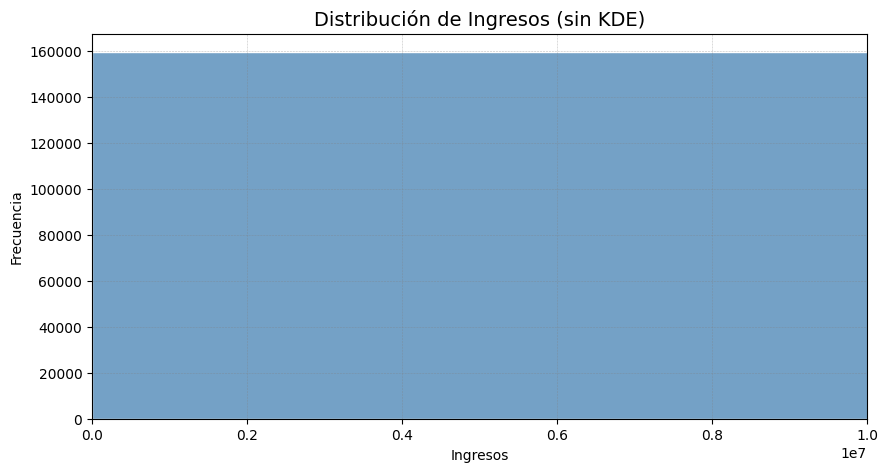

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Ingresos'], edgecolor="white", color="steelblue", linewidth=1, bins=50)
plt.title('Distribución de Ingresos (sin KDE)', fontsize=14)
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.xlim(0, 10_000_000)  # Ajuste para mostrar bien la mayoría de datos
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

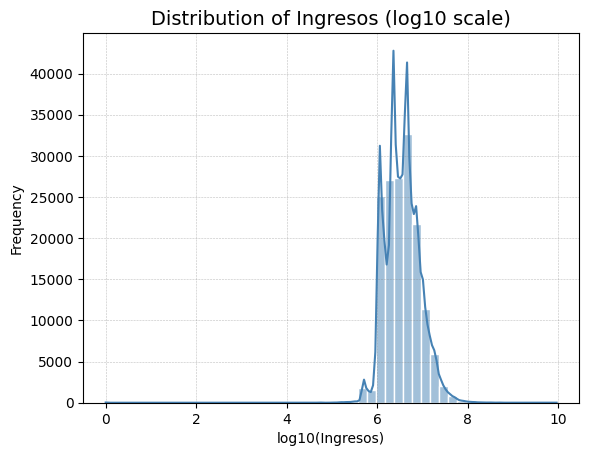

In [38]:
# Asegúrate de no tener ceros al aplicar log
df['log_ingresos'] = np.log10(df['Ingresos'].replace(0, np.nan))

sns.histplot(x=df['log_ingresos'], edgecolor="white", color="steelblue", linewidth=1, bins=50, kde=True)
plt.title('Distribution of Ingresos (log10 scale)', fontsize=14)
plt.xlabel("log10(Ingresos)")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

In [39]:
df['Ingresos'].isna().sum()

np.int64(0)

In [40]:
print("Lets calculate some outliers metrics:\n")

# Q1, Q3 & IQR
Q1 = np.percentile(df.Ingresos, 25)  # Q1 (25%)
Q3 = np.percentile(df.Ingresos, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df.Ingresos[(df.Ingresos < lower_limit) | (df.Ingresos > upper_limit)]
upper_outliers = df.Ingresos[(df.Ingresos > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of Ingresos consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df.shape[0]*100,2)}%')

Lets calculate some outliers metrics:

Outliers upper limit: $12,361,193.75
Outliers lower limit: $0
Number of Ingresos consider as outliers: 12729
% of outliers of the total observations: 7.97%


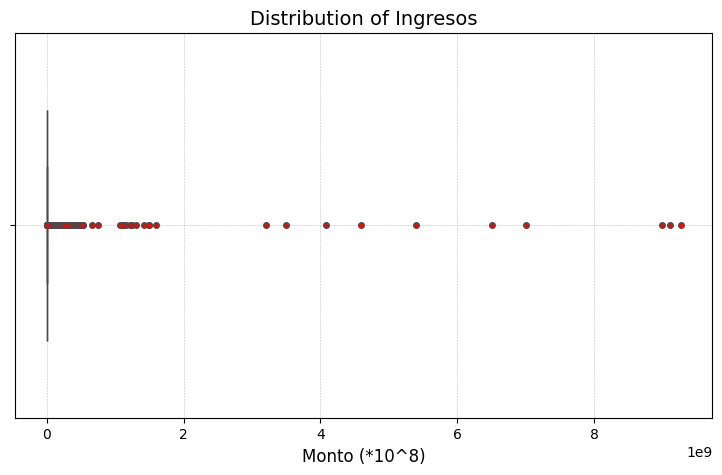

In [41]:
plt.figure(figsize=(9, 5))
sns.boxplot(x=df['Ingresos'], color="steelblue", linewidth=1, width=0.6,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of Ingresos", fontsize=14)
plt.xlabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.show()

Como vemos, esta columna tenia muy pocos datos nan y por lo tanto eliminarlas no me hace mucho efecto al modelo, por lo tanto, eliminamos.

#### Ingresos deflactados

In [42]:
df.Ingresos_Deflactados

,Ingresos_Deflactados
0,1330000.0
1,3718785.0
2,2025193.0
3,2157336.0
4,939723.0
...,...
185506,2289565.0
185507,7416410.0
185509,4449846.0
185510,8819018.0


In [43]:
df['Ingresos_Deflactados'].isna().sum()

np.int64(0)

In [44]:
print("¡lets calculate some important metrics!\n")
print("\n--Central tendency:")
print(f'Mean: {round(df.Ingresos_Deflactados.mean(),1):,}')
print(f'Median: {round(df.Ingresos_Deflactados.quantile(0.5),1):,}')
print(f'Mode: {round(df.Ingresos_Deflactados.mode()[0],1):,}')
print(f'Min: {round(df.Ingresos_Deflactados.min(),1):,}')
print(f'Max: {round(df.Ingresos_Deflactados.max(),1):,}')

print("\n--Measures of dispersion:")
print(f'standard deviation: {round(df.Ingresos_Deflactados.std(),1):,}')
print(f"Variation coefficient: {round(df['Ingresos_Deflactados'].std() / df['Ingresos_Deflactados'].mean() * 100,1)}")
print(f"Range: {round(df['Ingresos_Deflactados'].max() - df['Ingresos_Deflactados'].min(),1):,} ")
print(f"IQR: {round(df['Ingresos_Deflactados'].quantile(0.75) - df['Ingresos_Deflactados'].quantile(0.25),1):,} ")

print("\n--Measures of distribution shape:")
print(f"Skewness: {round(df['Ingresos_Deflactados'].skew(),1)}")
print(f"Kurtosis: {round(df['Ingresos_Deflactados'].kurtosis(),1)}")

print("\n--Some percentiles:")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
values= df['Ingresos_Deflactados'].quantile(percentiles).to_list()
print([f"P{int(p*100)}: {int(v):,}" for p, v in zip(percentiles, values)])

¡lets calculate some important metrics!


--Central tendency:
Mean: 5,887,635.5
Median: 3,441,437.0
Mode: 0.0
Min: 0.0
Max: 8,992,560,423.0

--Measures of dispersion:
standard deviation: 51,655,826.8
Variation coefficient: 877.4
Range: 8,992,560,423.0 
IQR: 4,236,973.5 

--Measures of distribution shape:
Skewness: 135.7
Kurtosis: 20728.9

--Some percentiles:
['P10: 1,114,535', 'P25: 1,951,650', 'P50: 3,441,437', 'P75: 6,188,624', 'P90: 10,832,387']


In [45]:
df['Ingresos_Deflactados'].isna().sum()

np.int64(0)

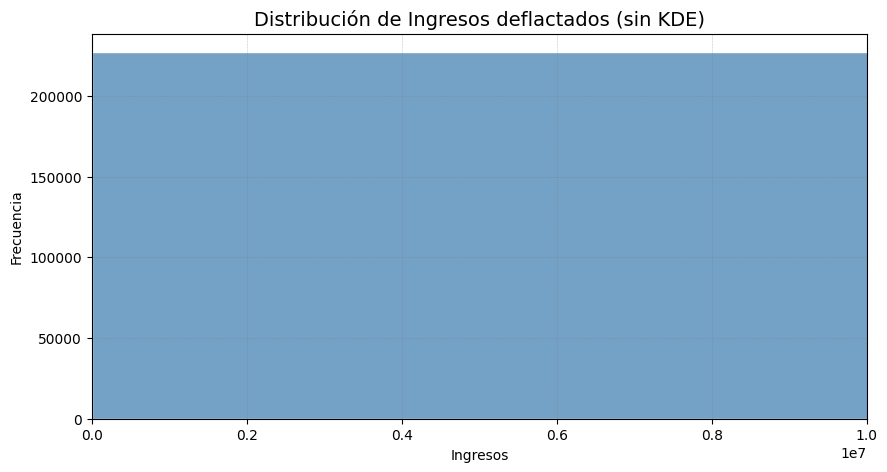

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Ingresos_Deflactados'], edgecolor="white", color="steelblue", linewidth=1, bins=50)
plt.title('Distribución de Ingresos deflactados (sin KDE)', fontsize=14)
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.xlim(0, 10_000_000)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

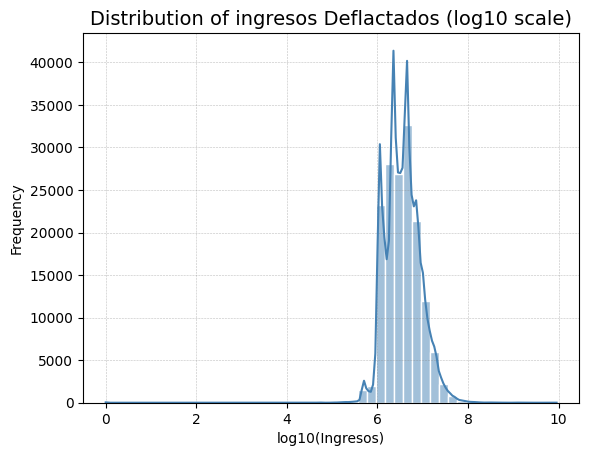

In [46]:
# Asegúrate de no tener ceros al aplicar log
df['log_ingresos_deflactados'] = np.log10(df['Ingresos_Deflactados'].replace(0, np.nan))

sns.histplot(x=df['log_ingresos_deflactados'], edgecolor="white", color="steelblue", linewidth=1, bins=50, kde=True)
plt.title('Distribution of ingresos Deflactados (log10 scale)', fontsize=14)
plt.xlabel("log10(Ingresos)")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

In [47]:
print("Lets calculate some outliers metrics:\n")

# Q1, Q3 & IQR
Q1 = np.percentile(df.Ingresos_Deflactados, 25)  # Q1 (25%)
Q3 = np.percentile(df.Ingresos_Deflactados, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df.Ingresos_Deflactados[(df.Ingresos_Deflactados < lower_limit) | (df.Ingresos_Deflactados > upper_limit)]
upper_outliers = df.Ingresos_Deflactados[(df.Ingresos_Deflactados > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of Ingrsos deflactados consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df.shape[0]*100,2)}%')

Lets calculate some outliers metrics:

Outliers upper limit: $12,544,084.25
Outliers lower limit: $0
Number of Ingrsos deflactados consider as outliers: 12581
% of outliers of the total observations: 7.88%


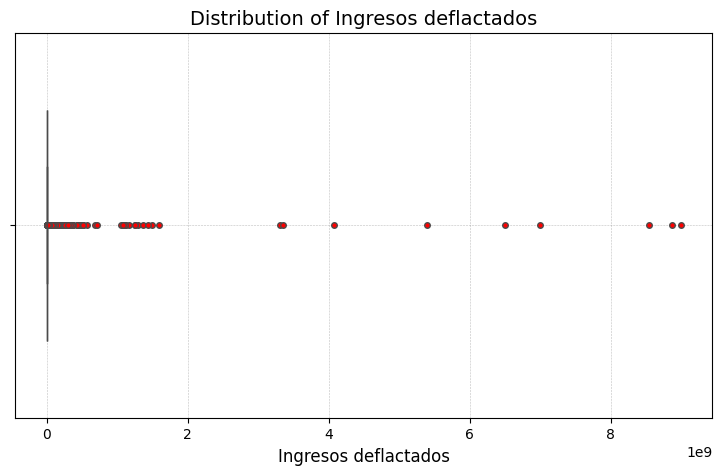

In [48]:
plt.figure(figsize=(9, 5))
sns.boxplot(x=df['Ingresos_Deflactados'], color="steelblue", linewidth=1, width=0.6,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of Ingresos deflactados", fontsize=14)
plt.xlabel("Ingresos deflactados", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.show()

In [49]:
df.to_parquet('Datos_ASOC_CMV_clean.parquet')

### **Analizando las variables de la ultima parte**

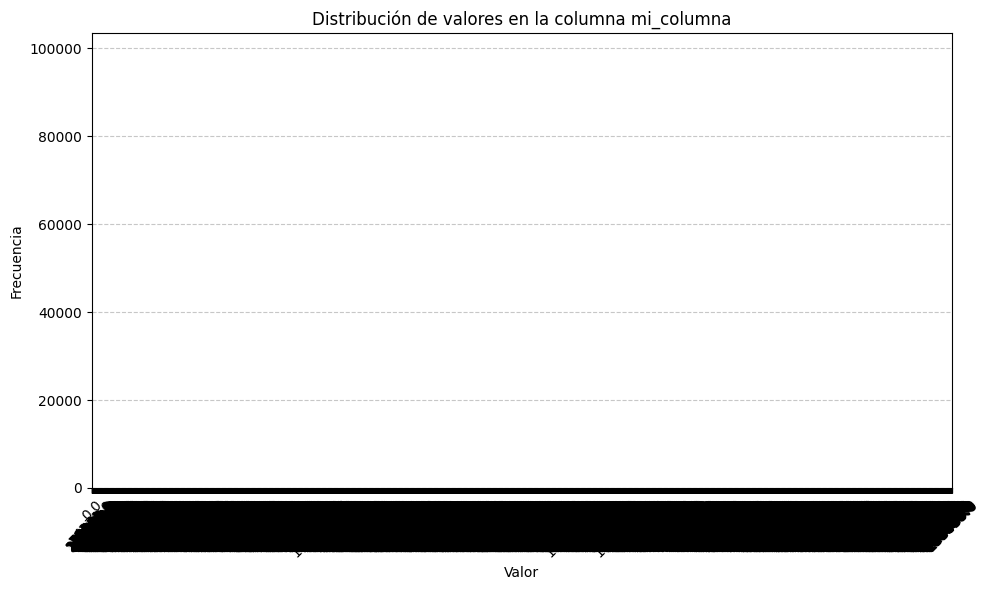

In [50]:
import matplotlib.pyplot as plt

# Cuenta la frecuencia de cada valor
conteo = df['Vlr_mora'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10,6))
conteo.plot(kind='bar', color='skyblue')
plt.title('Distribución de valores en la columna mi_columna')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


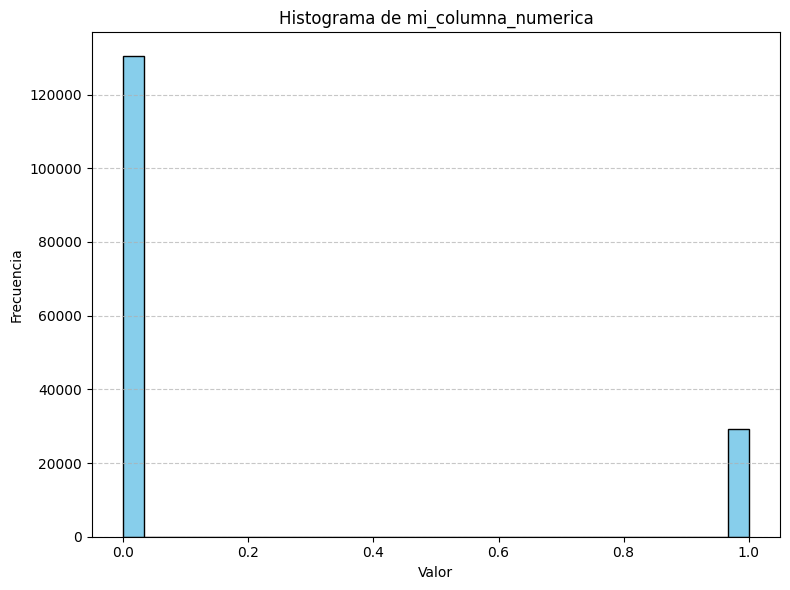

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['MasterCardCupo'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de mi_columna_numerica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()